# Faostat
The Food and Agriculture Organization of the United Nation ([FAO](https://www.fao.org/faostat/en/#data/RL)) collects data about the production of food worldwide. The data is published and made available through the [Faostat](https://www.fao.org/faostat/en/#home) webservice. Among the different datasets available, there are the Crops and livestock products dataset and the Land Use and Land Cover datasets. The monitoring of food production and of the area dedicated or available worldwide is one of the main task of the FAO. The future food availability can be forecast from this statistical data and additional data of weather forecast and climate. The data is provided by country or by region. The data about land use and production is collected annualy through questionnaire. The data about land cover is derived from remote sensing products from NASA (MODIS) and ESA (Copernicus Climate Change Service) and the maps are available from the Climate Change Initiative - Land Cover ([CCI-LC](https://maps.elie.ucl.ac.be/CCI/viewer/)) website, an outcome of the [ESA Land Cover project](https://climate.esa.int/en/projects/land-cover/). 

In [86]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import dates
import matplotlib.dates as mdates
from osgeo import gdal, osr, ogr
import geopandas as gpd
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')
from platform import python_version
print("Python version: %s"%python_version())
print("NumPy version: %s"%np.__version__)
print("Pandas version: %s"%pd.__version__)
print('GDAL version: %s'%gdal.__version__)
print("GeoPandas version: %s"%gpd.__version__)

Python version: 3.11.5
NumPy version: 1.25.2
Pandas version: 2.1.1
GDAL version: 3.7.2
GeoPandas version: 0.14.0


## World maize and millet yield
We download the data about the yield of maize and millet produced in the world from 1961 up to 2022. The dataset represents a time series. A visualization of the time series will allows us to see from a qualitative point of view whether there is a trend in the yield of these two important crops. From the Faostat website we select the [Crops and livestock products](https://www.fao.org/faostat/en/#data/QCL) dataset, and in particular the World region, the yield variable, the items maize (corn) and millet, and all the years. We download and store the CSV file.  

In [111]:
path_fao_dataset = 'data/fao/FAOSTAT_maize_millet_world_yeld.csv'
maize_millet_yield_tmp_df = pd.read_csv(path_fao_dataset)
maize_millet_yield_tmp_df.head(3)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,1,World,5419,Yield,112,Maize (corn),1961,1961,100 g/ha,19423,E,Estimated value,NaN
1,QCL,Crops and livestock products,1,World,5419,Yield,112,Maize (corn),1962,1962,100 g/ha,19796,E,Estimated value,NaN
2,QCL,Crops and livestock products,1,World,5419,Yield,112,Maize (corn),1963,1963,100 g/ha,20311,A,Official figure,NaN


We select the data for the maize yeld

In [112]:
maize_yield_df = maize_millet_yield_tmp_df[maize_millet_yield_tmp_df['Item']=='Maize (corn)'][['Year', 'Value']]
maize_yield_df.rename(columns={'Value':'Yield (g/ha)'}, inplace=True)
maize_yield_df.head(3)

,Year,Yield (g/ha)
0,1961,19423
1,1962,19796
2,1963,20311


and for the millet

In [ ]:
millet_yield_df = maize_millet_yield_tmp_df[maize_millet_yield_tmp_df['Item']=='Millet'][['Year', 'Value']]
millet_yield_df.rename(columns={'Value':'Yield (g/ha)'}, inplace=True)

We multiply the millet yield since it is provided in 100s of g/ha in order to use the same unit as the maize.

In [118]:
millet_yield = millet_yield_df['Yield (g/ha)']
millet_yield_df['Yield (g/ha)'] = millet_yield.apply(lambda millet_yield: millet_yield * 100)
millet_yield_df.head(3)

,Year,Yield (g/ha)
62,1961,59250000
63,1962,56190000
64,1963,57170000


We set the year as index

In [114]:
year_index = pd.date_range('1961', '2023', freq='Y')
maize_yield_df.set_index(year_index, inplace=True)
maize_yield_df.drop('Year', axis=1, inplace=True)
maize_yield_df.head(3)

,Yield (g/ha)
1961-12-31,19423
1962-12-31,19796
1963-12-31,20311


In [115]:
millet_yield_df.set_index(year_index, inplace=True)
millet_yield_df.drop('Year', axis=1, inplace=True)
millet_yield_df.head(3)

,Yield (g/ha)
1961-12-31,592500
1962-12-31,561900
1963-12-31,571700


Now we can plot the time series for maize and millet yields

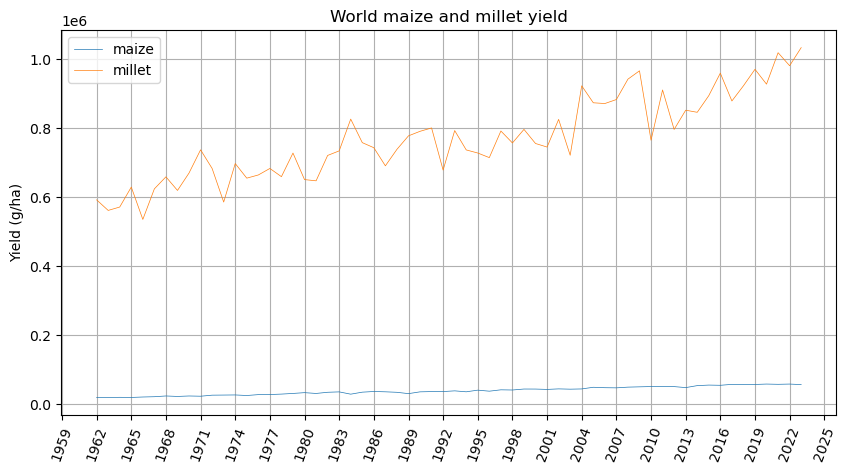

In [116]:
fig, ax = plt.subplots(figsize=(10,5))
ax.grid(True)
ax.set_title('World maize and millet yield')
ax.set_ylabel('Yield (g/ha)')
ax.set_xticks(maize_yield_df.index)
ax.set_xticklabels(maize_yield_df.index, rotation=70)
ax.xaxis.set_major_locator(dates.YearLocator(3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt_maize = ax.plot(maize_yield_df, linewidth=0.5, label='maize')
plt_millet = ax.plot(millet_yield_df, linewidth=0.5, label='millet')
plt.legend(loc='upper left')

## References
* [FAO Land Statistics](https://www.fao.org/3/cb2860en/cb2860en.pdf)